In [ ]:
# Pada code ini dilakukan pengunduhan data dari file excel yang sudah diupload di Google Drive
!gdown --id 1DxEB7B0f0NbgA2EN6BbNghwk90sNKiLN

In [ ]:
# melakukan import semua library yang dibutuhkan pada projek ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Sumber Data
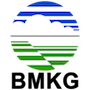
* ID WMO : 97374
* Nama Stasiun : Sstasiun Klimatologi Nusa Tenggara Timur
* Lintang: -10.13861
* Bujur: 123.66722
* Elevasi: 19

## Keterangan Data:
* 8888 : data tidak terukur
* 9999 : Tidak ada data (tidak dilakukan pengukuran)
* Tn : Temperatur minimum (°C)
* Tx : Tempratur maksimum (°C)
* Tavg : Tempratur rata-rata (°C)
* RH_avg : Kelembapan rata-rata (%)
* RR : Curah hujan (mm)
* ss : Lamanya penyinaran matahari (jam)

In [ ]:
# Membaca data yang sudah didownload menggunakan library pandas kemudian menyimpan hasilnya kedalam variabel
df = pd.read_excel('/content/laporan_iklim_harian.xlsx')

In [ ]:
# Mencetak data frame yang sudah disimpan di dalam variabel df
df

In [ ]:
# Melakukan pemeriksaan secara singkat tentang data frame
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Berdasarkan data yang diperoleh BMKG, didapat data tentang curah hujan sebanyak 91 selama 3 bulan yaitu dari 1-Jan-2022 sampai 1-Apr-2022. Berdasarkan hasil cetak data, terlihat data menggunakan kode-kode nama yang mungkin akan kita ganti dengan nama yang lebih familiar. Kemudian terlihat ada beberapa kolom yang tidak memiliki data lengkap seperti Tn (tempratur minimum) dan RR (curah hujan). Selain itu, terlihat juga pada keterangan bahwa ada data yang dicatat sebagai kode seperti 8888 sebagai data tidak terukur dan 9999 sebagai tidak ada data. Oleh karena itu, pada projek ini baris yang memiliki data tidak lengkap, nilai 9999, dan 8888 akan dibuang.

In [ ]:
#mendefinisikan nilai yang akan dibuang
values = [8888, 9999]

#membuang semua baris pada kolom RR (curah hujan) yang memiliki nilai yang sudah didefinisikan sebelumnya
df = df[df.RR.isin(values) == False]

In [ ]:
df.rename(columns = {'Tn':'Suhu_minimum'}, inplace = True)
df.rename(columns = {'Tx':'Suhu_maksimum'}, inplace = True)
df.rename(columns = {'Tavg':'Rerata_suhu'}, inplace = True)
df.rename(columns = {'RH_avg':'Rerata_Kelembapan'}, inplace = True)
df.rename(columns = {'RR':'Curah_hujan'}, inplace = True)
df.rename(columns = {'ss':'Sinar_matahari'}, inplace = True)

In [ ]:
df.head(3)

# Eksplorasi Data

In [ ]:
#create scatterplot with regression line and confidence interval lines
sns.regplot(df['Rerata_suhu'], df['Curah_hujan'])

In [ ]:
#create scatterplot with regression line and confidence interval lines
sns.regplot(df['Rerata_Kelembapan'], df['Curah_hujan'])

In [ ]:
#create scatterplot with regression line and confidence interval lines
sns.regplot(df['Sinar_matahari'], df['Curah_hujan'])

In [ ]:
#create scatterplot with regression line and confidence interval lines
sns.regplot(df['Suhu_minimum'], df['Curah_hujan'])

In [ ]:
#create scatterplot with regression line and confidence interval lines
sns.regplot(df['Suhu_maksimum'], df['Curah_hujan'])

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

In [ ]:
df.drop(['Tanggal'],axis=1,inplace=True)

# Membuat model

In [ ]:
#Define Variable
x = df.drop(['Curah_hujan'], axis=1).values
y = df['Curah_hujan'].values

In [ ]:
#Split train & test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123) #Train:Test (80:2c0)

In [ ]:
RF = RandomForestRegressor()
REG = DecisionTreeRegressor()
XGB = XGBRegressor()
GB = GradientBoostingRegressor()

In [ ]:
listmodel = [RF, REG, XGB, GB]
namamodel = ["Random Forest", "Decision Tree", "XGBoost", "Gradient Boost"]

In [ ]:
# Multiply by -1 since sklearn calculates *negative* MAE
acc_model = []
acc_std = []

for model in listmodel :
  scores = -1 * cross_val_score(model, x_train, y_train,
                                cv=5,
                                scoring='neg_mean_absolute_error')
  acc_model.append(scores.mean())
  acc_std.append(scores.std())

In [ ]:
pembanding = pd.DataFrame({
    'Nama Model' : namamodel,
    'Rata-rata MAE' : acc_model,
    'Standar Deviasi MAE' : acc_std
})

pembanding

Misal MAE paling rendah adalah Gradient Boost

In [ ]:
GB.fit(x_train, y_train)

In [ ]:
GB.fit(x_train, y_train)
preds_test = GB.predict(x_test)

In [ ]:
print(mean_absolute_error(y_test, preds_test))

## Check User Input

In [ ]:
suhu_minimum = input("Masukan suhu minimum = ")
suhu_maksimum = input("Masukan suhu maksimum = ")
suhu_rata2 = input("Masukan suhu rata-rata = ")
kelembapan = input("Masukan nilai kelembapan = ")
sinar_matahari = input("Masukan durasi sinar matahari =")

input_user = {'Suhu_minimum':suhu_minimum,
        'Suhu_maksimum':suhu_maksimum,
        'Rerata_suhu	':suhu_rata2,
        'Rerata_Kelembapan	':kelembapan,
        'Sinar_matahari': sinar_matahari
        }

check_input = pd.DataFrame(input_user, index=[0])
template_output = "Prediksi hujan dengan kriteria tersebut adalah"
prediksi_hujan = GB.predict(check_input)

print(prediksi_hujan)
if(prediksi_hujan>150):
    print(template_output,"Hujan ekstrem")
elif(prediksi_hujan>100):
    print(template_output,"Hujan sangat lebat")
elif(prediksi_hujan>50):
    print(template_output,"Hujan lebat")
elif(prediksi_hujan>20):
    print(template_output,"Hujan sedang")
elif(prediksi_hujan>0.5):
    print(template_output,"Hujan ringan")
else:
    print(template_output,"Berawan")

https://www.bmkg.go.id/cuaca/probabilistik-curah-hujan.bmkg
* 0 mm/hari (abu-abu) : Berawan
* 0.5 – 20 mm/hari (hijau) : Hujan ringan
* 20 – 50 mm/hari (kuning) : Hujan sedang
* 50 – 100 mm/hari (oranye): Hujan lebat
* 100 – 150 mm/hari (merah) : Hujan sangat lebat
* lebih dari 150 mm / hari (ungu) : Hujan ekstrem